 # Classifierアルゴリズム
 
 ## `Classifier()`
 
SDR 分類器は、単層の分類ネットワークの形をしています。SDRを入力として受け取り、カテゴリの予測分布を出力します。
 
カテゴリは、符号なし整数でラベル付けされます。 他のデータ型は、列挙するか、正整数に変換する必要があります。 出力単位は、最大カテゴリラベルの数だけあります。

推論の間、出力は最初にすべての入力の加重和を行い、その後、カテゴリーラベルの予測分布を得るためにソフトマックス非線形関数を実行することによって計算されます。

学習中、入力ユニットと出力ユニット間の接続重みは、モデルの尤度を最大化するように調整される。

### メソッド

`infer(...)`：

引数パターンは、アクティブな入力ビットを含む SDRです。

PDF（Probablility Distribution Function）は、カテゴリの確率分布関数を返します。PDF は、合計が 1 になる確率のリストです。

このリストの**各インデックスはカテゴリのラベル**であり、**各値はそのカテゴリの尤度**である。確率が最も高いカテゴリを見つけるには、`numpy.argmax`を使用してください。

## カテゴリ分類器

In [20]:
import numpy as np
from htm.bindings.sdr import SDR
from htm.bindings.algorithms import Classifier

categories = { 'A': 0, 'B': 1, 'C': 2, 'D': 3 }

# ランダムなSDRを作成し、カテゴリに関連付けます。
inputData  = SDR( dimensions = (1000 , ) ).randomize( 0.02 )
print("-"*70 )
print("inputData: ",inputData)
clsr = Classifier()
clsr.learn( inputData, categories['D'] )
print("-"*70 )
print("PDF: ",clsr.infer( inputData ) )
print("-"*70 )
predict = np.argmax( clsr.infer( inputData ) )  #->  categories['D']
print("predict index: ",predict)

predict_key = [k for k, v in categories.items() if v == predict]
print("-"*70 )
print("predict lebel: ",predict_key[0])

----------------------------------------------------------------------
inputData:  SDR( 1000 ) 0, 157, 167, 182, 218, 301, 483, 491, 500, 631, 646, 778, 784, 785, 828, 842, 883, 893, 909, 958
----------------------------------------------------------------------
PDF:  [0.248743755155006, 0.248743755155006, 0.248743755155006, 0.2537687125734917]
----------------------------------------------------------------------
predict index:  3
----------------------------------------------------------------------
predict lebel:  D


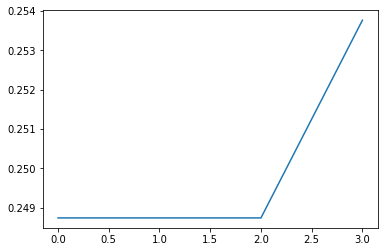

In [21]:
import matplotlib.pyplot as plt
plt.plot(clsr.infer( inputData ))
plt.show()

## スカラー分類器

In [19]:
import numpy as np
from htm.bindings.sdr import SDR
from htm.bindings.algorithms import Classifier

clsr = Classifier()

# スカラー値を推定します． 
# Classifierはカテゴリしか受け付けないので、
# 最小値を引き算して解像度で割ることで、
# 実数値の入力をビン(別名バケツ)に入れてください。
scalar     = 567.8
minimum    = 500
resolution = 10

inputData  = SDR( dimensions = (1000 , ) ).randomize( 0.02 )
print("-"*70 )
print("inputData: ",inputData)
clsr.learn( inputData, int((scalar - minimum) / resolution) )
print("-"*70 )
print("PDF: ",clsr.infer( inputData ) )
predict = np.argmax( clsr.infer( inputData ) ) * resolution + minimum  #->  560
print("-"*70 )
print("predict : ",predict)

----------------------------------------------------------------------
inputData:  SDR( 1000 ) 22, 26, 74, 135, 137, 204, 237, 450, 570, 596, 627, 651, 665, 741, 762, 809, 832, 867, 953, 997
----------------------------------------------------------------------
PDF:  [0.14244605336420796, 0.14244605336420796, 0.14244605336420796, 0.14244605336420796, 0.14244605336420796, 0.14244605336420796, 0.1453236546617378]
----------------------------------------------------------------------
predict :  560


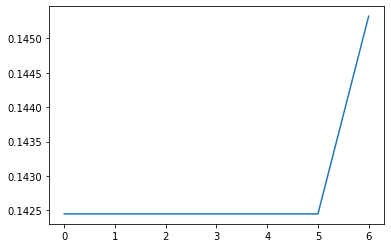

In [10]:
plt.plot(clsr.infer( inputData ))
plt.show()